# Pima Indians Diabetes - DNN Classifier

This notebook performs data preprocessing, visualization, scaling, and builds a DNN model using TensorFlow Keras.

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [146]:
# Load the dataset
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [147]:
# Checking for missing values and statistics
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [148]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


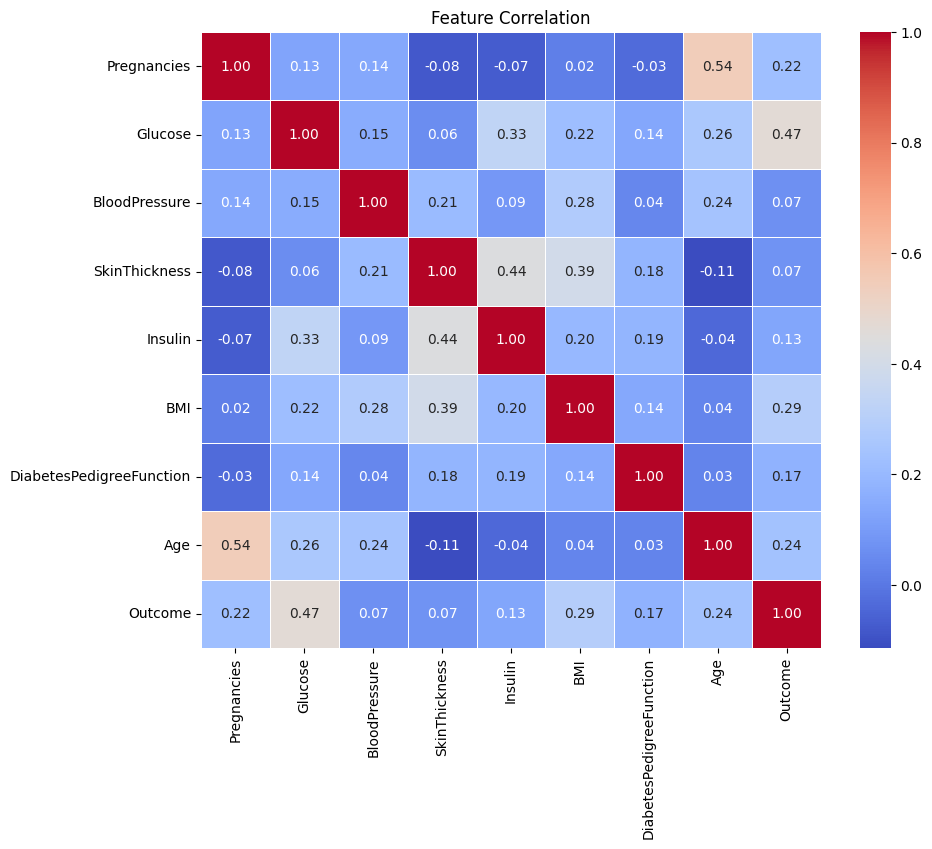

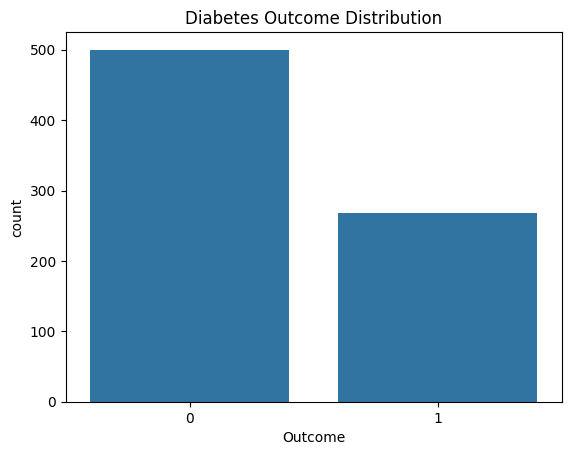

In [149]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation")
plt.show()

# Target distribution
sns.countplot(x='Outcome', data=diabetes_data)
plt.title("Diabetes Outcome Distribution")
plt.show()

In [150]:
shape = diabetes_data.shape
print(f"Dataset shape: {shape}")

Dataset shape: (768, 9)


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features and target
X = diabetes_data.drop('Outcome', axis=1)
Y = diabetes_data['Outcome']

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=42, stratify=Y)

# Apply SMOTE to training set only
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

print("Original training shape:", X_train.shape, Y_train.shape)
print("After SMOTE:", X_train_smote.shape, Y_train_smote.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


Original training shape: (614, 8) (614,)
After SMOTE: (800, 8) (800,)
Testing set shape: (154, 8) (154,)


In [152]:
# Normalize using StandardScaler (fit only on SMOTE-transformed training data)
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Build the DNN model
def build_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(X_train_smote.shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the model
model = build_model()
summary = model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 11,969 (46.75 KB)

 Non-trainable params: 448 (1.75 KB)

# Epochs 32 / Batch size 32

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5551 - loss: 0.8677 - val_accuracy: 0.2750 - val_loss: 0.7201
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5529 - loss: 0.8850 - val_accuracy: 0.2500 - val_loss: 0.7471
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5900 - loss: 0.7928 - val_accuracy: 0.2625 - val_loss: 0.7628
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5488 - loss: 0.8835 - val_accuracy: 0.2875 - val_loss: 0.7659
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6224 - loss: 0.7450 - val_accuracy: 0.3000 - val_loss: 0.7669
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6447 - loss: 0.7195 - val_accuracy: 0.3250 - val_loss: 0.7646
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6384 - loss: 0.6957 - val_accuracy: 0.3500 - val_loss: 0.7604
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6155 - loss: 0.7198 - val_accuracy: 0.4125 - val_los

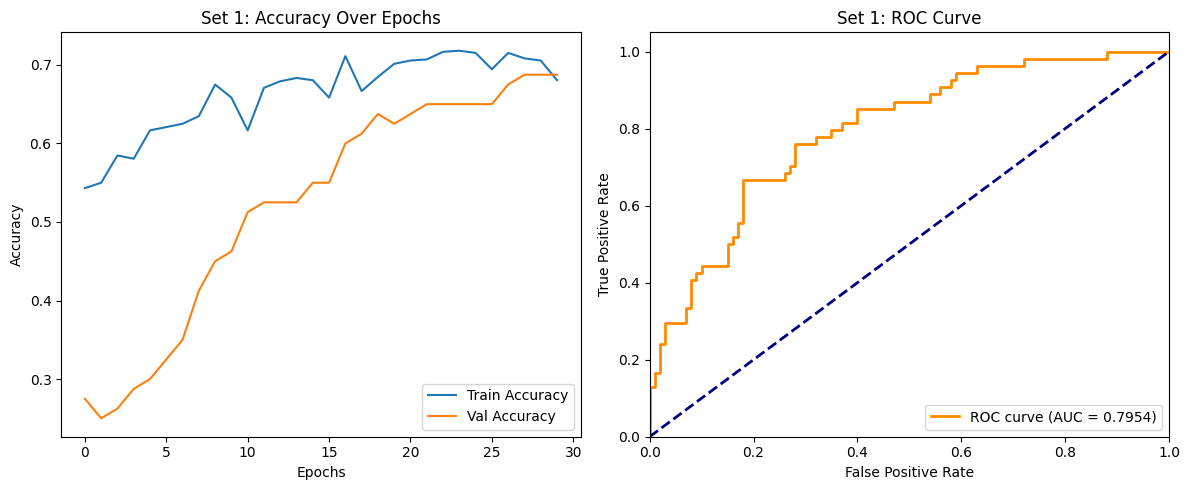

In [155]:
from sklearn.metrics import roc_curve, auc
# Train the model - Set 1
history1 = model.fit(X_train_smote, Y_train_smote, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
loss1, accuracy1 = model.evaluate(X_test, Y_test)
print(f"Set 1 - Test Loss: {loss1:.4f}, Test Accuracy: {accuracy1:.4f}")

# Predict and evaluate
y_pred1 = model.predict(X_test)
y_pred_classes1 = (y_pred1 > 0.5).astype(int)
print("Set 1 - Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_classes1))
print("\nSet 1 - Classification Report:\n", classification_report(Y_test, y_pred_classes1))

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(Y_test, y_pred1)
roc_auc = auc(fpr, tpr)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: training history
axs[0].plot(history1.history['accuracy'], label='Train Accuracy')
axs[0].plot(history1.history['val_accuracy'], label='Val Accuracy')
axs[0].set_title('Set 1: Accuracy Over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot 2: ROC Curve
axs[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Set 1: ROC Curve')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()



## Epochs 30 and Batch Size 32


- Test Accuracy: **72.08%**

**Confution Matrix**

- True Negatives (TN): **74**
- False Positives (FP): **26**
- False Negatives (FN): **17**
- True Positives (TP): **37**

**Key Insight:**

- **Recall for Positive Class**: The recall of 69% for class 1 shows the model is reasonably good at identifying positive cases.
- **Balanced F1 Scores:** F1-scores for both classes (0.77 for class 0, 0.63 for class 1) indicate a relatively fair balance between precision and recall, especially for the minority class.
- **False Positives Still Present:** 26 false positives suggests this could impact precision and lead to unnecessary follow-ups in real-world use.
- **ROC AUC Close to 0.8:** The score of 0.7954 reflects a good ability to distinguish between the two classes.

# Epochs 50 / Batch size 16

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7192 - loss: 0.6086 - val_accuracy: 0.7000 - val_loss: 0.5914
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7096 - loss: 0.6145 - val_accuracy: 0.6875 - val_loss: 0.5899
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7229 - loss: 0.6090 - val_accuracy: 0.6875 - val_loss: 0.5859
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7146 - loss: 0.6111 - val_accuracy: 0.7000 - val_loss: 0.5814
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6567 - loss: 0.6665 - val_accuracy: 0.7000 - val_loss: 0.5767
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7018 - loss: 0.5927 - val_accuracy: 0.7000 - val_loss: 0.5720
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7108 - loss: 0.6026 - val_accuracy: 0.7000 - val_loss: 0.5623
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7006 - loss: 0.5974 - val_accuracy: 0.6875 - val_loss:

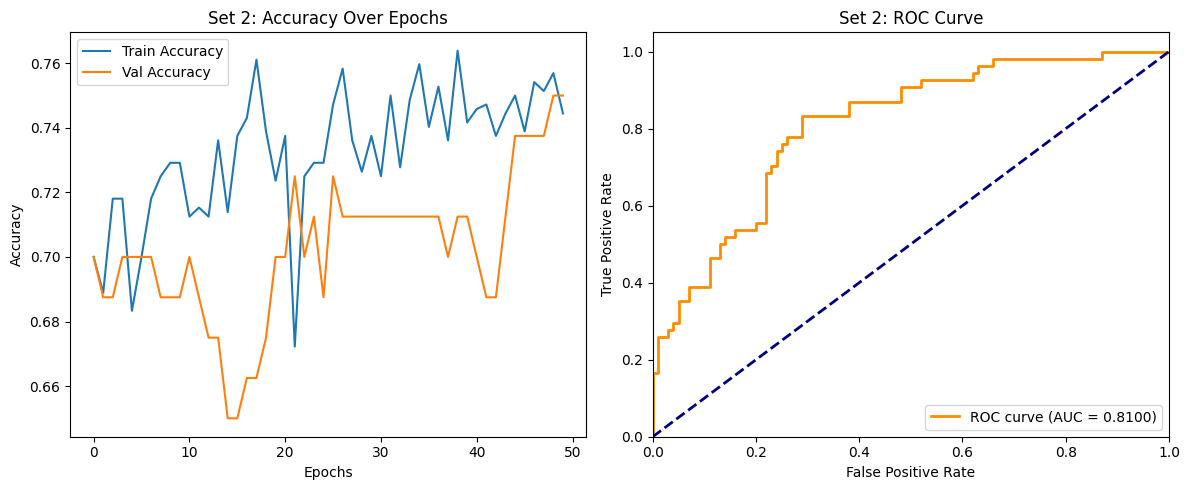

In [156]:
# Train the model - Set 2
history2 = model.fit(X_train_smote, Y_train_smote, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# Evaluate the model
loss2, accuracy2 = model.evaluate(X_test, Y_test)
print(f"Set 2 - Test Loss: {loss2:.4f}, Test Accuracy: {accuracy2:.4f}")

# Predict and evaluate
y_pred2 = model.predict(X_test)
y_pred_classes2 = (y_pred2 > 0.5).astype(int)
print("Set 2 - Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_classes2))
print("\nSet 2 - Classification Report:\n", classification_report(Y_test, y_pred_classes2))

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(Y_test, y_pred2)
roc_auc = auc(fpr, tpr)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: training history
axs[0].plot(history2.history['accuracy'], label='Train Accuracy')
axs[0].plot(history2.history['val_accuracy'], label='Val Accuracy')
axs[0].set_title('Set 2: Accuracy Over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot 2: ROC Curve
axs[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Set 2: ROC Curve')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


## Epochs 50 and Batch Size 16

- Test Accuracy: **74.68%**

**Confusion Matrix**

- True Negatives (TN): **78**
- False Positives (FP): **22**
- False Negatives (FN): **17**
- True Positives (TP): **37**

**Key Insight:**

- The model shows a balanced performance, achieving a moderate test accuracy of 74.68%.
- Class 1 recall is **69%,** indicating the model is fairly effective at detecting positive cases.
- The F1-scores for both classes **(0.80 for class 0, 0.65 for class 1)** suggest a reasonably balanced prediction.
- The ROC AUC score of **0.8100** confirms a good distinction capability between the two classes.
- Still, the 22 false positives may affect precision in real-world applications and indicate potential over-prediction of positive cases.

# Epochs 100 / Batch size 32

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7388 - loss: 0.5423 - val_accuracy: 0.7500 - val_loss: 0.5258
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7411 - loss: 0.5161 - val_accuracy: 0.7500 - val_loss: 0.5294
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7576 - loss: 0.5035 - val_accuracy: 0.7500 - val_loss: 0.5251
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7491 - loss: 0.4885 - val_accuracy: 0.7625 - val_loss: 0.5244
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7651 - loss: 0.4865 - val_accuracy: 0.7625 - val_loss: 0.5232
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7594 - loss: 0.5103 - val_accuracy: 0.7625 - val_loss: 0.5209
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7674 - loss: 0.4776 - val_accuracy: 0.7500 - val_loss: 0.5179
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7774 - loss: 0.4788 - val_accuracy: 0.7625 - v

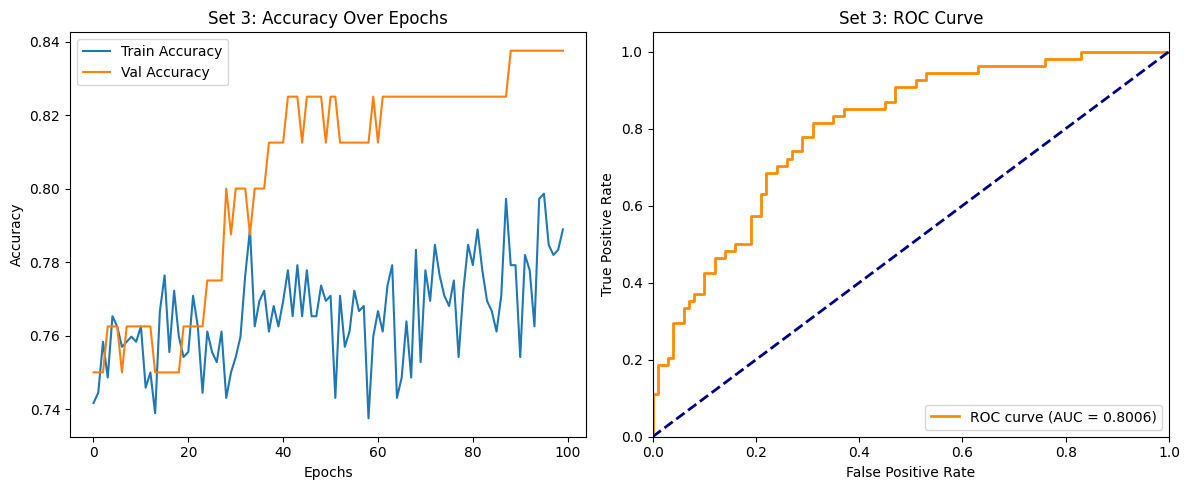

In [157]:
# Train the model - Set 3
history3 = model.fit(X_train_smote, Y_train_smote, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
loss3, accuracy3 = model.evaluate(X_test, Y_test)
print(f"Set 3 - Test Loss: {loss3:.4f}, Test Accuracy: {accuracy3:.4f}")

# Predict and evaluate
y_pred3 = model.predict(X_test)
y_pred_classes3 = (y_pred3 > 0.5).astype(int)
print("Set 3 - Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_classes3))
print("\nSet 3 - Classification Report:\n", classification_report(Y_test, y_pred_classes3))

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(Y_test, y_pred3)
roc_auc = auc(fpr, tpr)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: training history
axs[0].plot(history3.history['accuracy'], label='Train Accuracy')
axs[0].plot(history3.history['val_accuracy'], label='Val Accuracy')
axs[0].set_title('Set 3: Accuracy Over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot 2: ROC Curve
axs[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Set 3: ROC Curve')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


## Epochs 100 and Batch Size 32

- Test Accuracy: **74.03%**

**Confusion Matrix**

- True Negatives (TN): **78**
- False Positives (FP): **22**
- False Negatives (FN): **18**
- True Positives (TP): **36**

**Key Insight:**

- The model maintains a consistent test accuracy of **74.03%**, showing stable generalization even with more epochs.
- The recall for class 1 is **67%**, slightly improved, indicating reasonable sensitivity to detecting positive cases.
- Precision and F1-scores are balanced across both classes **(F1-score: 0.80 for class 0 and 0.64 for class 1)**.
- The ROC AUC score of **0.8006** confirms solid discriminative power.
- Despite more training epochs, there is no major gain in performance, hinting that the model might be reaching its learning plateau.

# Epochs 100 / Batch size 128

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7620 - loss: 0.4710 - val_accuracy: 0.8250 - val_loss: 0.4635
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7853 - loss: 0.4451 - val_accuracy: 0.8250 - val_loss: 0.4643
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7704 - loss: 0.4691 - val_accuracy: 0.8250 - val_loss: 0.4642
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7824 - loss: 0.4552 - val_accuracy: 0.8250 - val_loss: 0.4640
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7815 - loss: 0.4760 - val_accuracy: 0.8250 - val_loss: 0.4649
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7939 - loss: 0.4394 - val_accuracy: 0.8250 - val_loss: 0.4652
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7997 - loss: 0.4354 - val_accuracy: 0.8250 - val_loss: 0.4650
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7589 - loss: 0.5018 - val_accuracy: 0.8250 - val_loss:

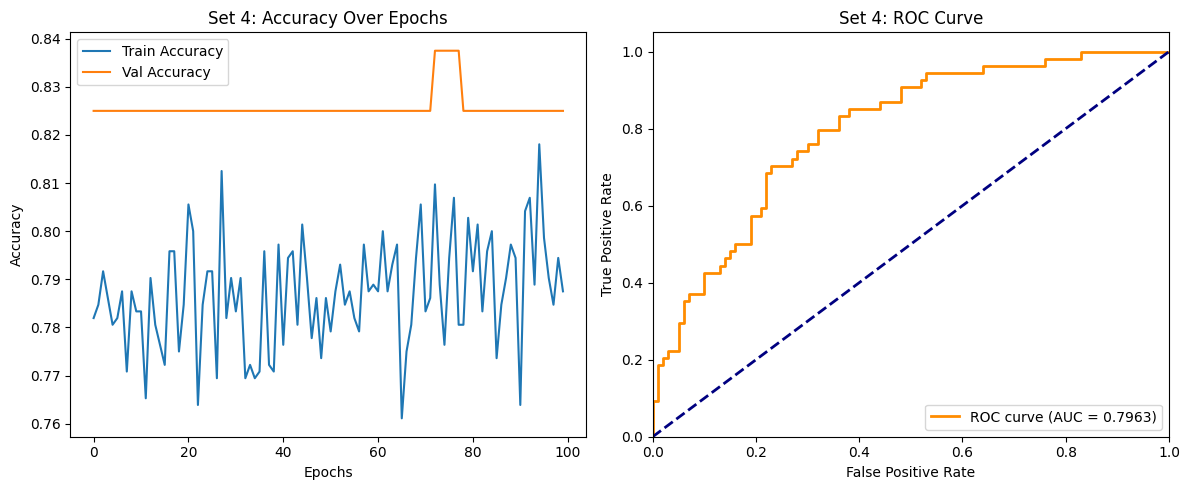

In [158]:
# Train the model - Set 4
history4 = model.fit(X_train_smote, Y_train_smote, epochs=100, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model
loss4, accuracy4 = model.evaluate(X_test, Y_test)
print(f"Set 4 - Test Loss: {loss4:.4f}, Test Accuracy: {accuracy4:.4f}")

# Predict and evaluate
y_pred4 = model.predict(X_test)
y_pred_classes4 = (y_pred4 > 0.5).astype(int)
print("Set 4 - Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_classes4))
print("\nSet 4 - Classification Report:\n", classification_report(Y_test, y_pred_classes4))

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(Y_test, y_pred4)
roc_auc = auc(fpr, tpr)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: training history
axs[0].plot(history4.history['accuracy'], label='Train Accuracy')
axs[0].plot(history4.history['val_accuracy'], label='Val Accuracy')
axs[0].set_title('Set 4: Accuracy Over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot 2: ROC Curve
axs[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Set 4: ROC Curve')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

## Epochs 100 and Batch Size 128

- Test Accuracy: **74.03%**

**Confusion Matrix**

- True Negatives (TN): **78**
- False Positives (FP): **22**
- False Negatives (FN): **18**
- True Positives (TP): **36**

**Key Insight:**

- Test accuracy remains steady at **74.03%**, identical to Set 3, indicating that increasing batch size to **128** did not affect overall accuracy.
- Class 1 recall is **67%,** showing consistent ability to detect positives compared to previous sets.
- F1-scores and precision are well balanced for both classes, indicating no overfitting despite larger batch size.
- ROC AUC of **0.7963** supports the model's decent classification strength.
- Larger batch size leads to faster training, but with no significant performance boost, suggesting an optimal trade-off between training speed and accuracy.

# Epochs 150 / Batch size 16

Epoch 1/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7830 - loss: 0.4742 - val_accuracy: 0.8375 - val_loss: 0.4359
Epoch 2/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7481 - loss: 0.4881 - val_accuracy: 0.8250 - val_loss: 0.4374
Epoch 3/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8054 - loss: 0.4373 - val_accuracy: 0.8375 - val_loss: 0.4350
Epoch 4/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7831 - loss: 0.4552 - val_accuracy: 0.8250 - val_loss: 0.4385
Epoch 5/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8005 - loss: 0.4447 - val_accuracy: 0.8250 - val_loss: 0.4387
Epoch 6/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7810 - loss: 0.4634 - val_accuracy: 0.8250 - val_loss: 0.4324
Epoch 7/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7719 - loss: 0.4445 - val_accuracy: 0.8250 - val_loss: 0.4304
Epoch 8/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7973 - loss: 0.4286 - val_accuracy: 0.8250 - v

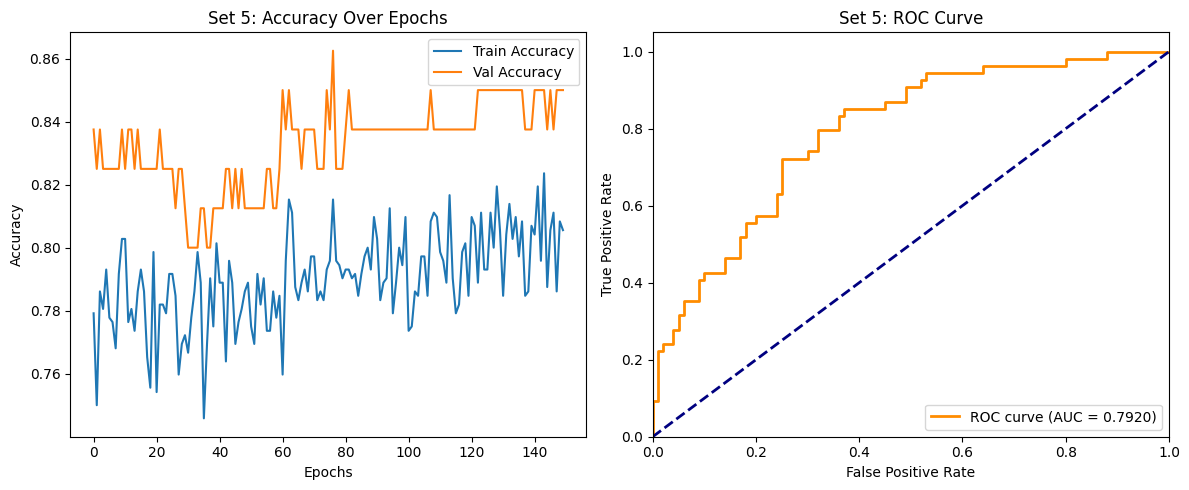

In [159]:
# Train the model - Set 5
history5 = model.fit(X_train_smote, Y_train_smote, epochs=150, batch_size=16, validation_split=0.1, verbose=1)

# Evaluate the model
loss5, accuracy5 = model.evaluate(X_test, Y_test)
print(f"Set 5 - Test Loss: {loss5:.4f}, Test Accuracy: {accuracy5:.4f}")

# Predict and evaluate
y_pred5 = model.predict(X_test)
y_pred_classes5 = (y_pred5 > 0.5).astype(int)
print("Set 5 - Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_classes5))
print("\nSet 5 - Classification Report:\n", classification_report(Y_test, y_pred_classes5))

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(Y_test, y_pred5)
roc_auc = auc(fpr, tpr)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: training history
axs[0].plot(history5.history['accuracy'], label='Train Accuracy')
axs[0].plot(history5.history['val_accuracy'], label='Val Accuracy')
axs[0].set_title('Set 5: Accuracy Over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot 2: ROC Curve
axs[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Set 5: ROC Curve')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


## Epochs 150 and Batch Size 16

- Test Accuracy: **72.08%**

**Confusion Matrix**

- True Negatives (TN): **75**
- False Positives (FP): **25**
- False Negatives (FN): **18**
- True Positives (TP): **36**

**Key Insight:**

- Increasing epochs to 150 did not improve accuracy **(72.08%)** and led to the highest test loss **(0.5728)** among all sets, indicating possible overfitting.
- Class **0** continues to show strong performance, while **Class 1 recall (67%)** remains stable but limited, suggesting difficulty in fully capturing the minority class.
- F1-score for Class **1 is 0.63** — consistent with earlier sets, but not improved by longer training.
- ROC AUC of **0.7920**, though slightly lower, still reflects decent model discrimination.
- Overall, longer training with small batch size does not provide performance gains, and may add unnecessary training time.

# Comparing Metrics of All 5 Sets 

In [160]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Collect FN and FP from confusion matrices
def get_fn_fp(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn, fp

# Get FN/FP for each set
fn1, fp1 = get_fn_fp(Y_test, y_pred_classes1)
fn2, fp2 = get_fn_fp(Y_test, y_pred_classes2)
fn3, fp3 = get_fn_fp(Y_test, y_pred_classes3)
fn4, fp4 = get_fn_fp(Y_test, y_pred_classes4)
fn5, fp5 = get_fn_fp(Y_test, y_pred_classes5)

# Define all metrics in dictionary
metrics = {
    "Set": ["Set 1", "Set 2", "Set 3", "Set 4", "Set 5"],
    "Epoch/Batch Size": ["30/32", "50/16", "100/32", "100/128", "150/16"],
    "Test Loss": [loss1, loss2, loss3, loss4, loss5],
    "Test Accuracy": [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5],
    "Precision": [
        precision_score(Y_test, y_pred_classes1),
        precision_score(Y_test, y_pred_classes2),
        precision_score(Y_test, y_pred_classes3),
        precision_score(Y_test, y_pred_classes4),
        precision_score(Y_test, y_pred_classes5),
    ],
    "Recall": [
        recall_score(Y_test, y_pred_classes1),
        recall_score(Y_test, y_pred_classes2),
        recall_score(Y_test, y_pred_classes3),
        recall_score(Y_test, y_pred_classes4),
        recall_score(Y_test, y_pred_classes5),
    ],
    "F1 Score": [
        f1_score(Y_test, y_pred_classes1),
        f1_score(Y_test, y_pred_classes2),
        f1_score(Y_test, y_pred_classes3),
        f1_score(Y_test, y_pred_classes4),
        f1_score(Y_test, y_pred_classes5),
    ],
    "False Negatives (FN)": [fn1, fn2, fn3, fn4, fn5],
    "False Positives (FP)": [fp1, fp2, fp3, fp4, fp5],
}

# Create DataFrame
results_df = pd.DataFrame(metrics)

# Display table
print("\n=== Model Performance Comparison Table ===")
results_df.round(4)



=== Model Performance Comparison Table ===


,Set,Epoch/Batch Size,Test Loss,Test Accuracy,Precision,Recall,F1 Score,False Negatives (FN),False Positives (FP)
0,Set 1,30/32,0.5413,0.7208,0.5873,0.6852,0.6325,17,26
1,Set 2,50/16,0.5263,0.7468,0.6271,0.6852,0.6549,17,22
2,Set 3,100/32,0.5468,0.7403,0.6207,0.6667,0.6429,18,22
3,Set 4,100/128,0.5535,0.7403,0.6207,0.6667,0.6429,18,22
4,Set 5,150/16,0.5728,0.7208,0.5902,0.6667,0.6261,18,25


# Final Observtion of all DNN Epochs/Batch results

**Key Observations**

**Set 2 (50 Epochs / Batch Size 16) consistently outperforms all others:**

- Highest test accuracy (74.68%)
- Best precision (0.6271), recall (0.6852), and F1-score (0.6549)
- Lowest test loss (0.5263), indicating better generalization
- Least false positives (22) and shared lowest false negatives (17)

**Set 3 and 4 (Epochs = 100) perform similarly in all metrics but do not surpass Set 2. which may indicate a performance plateau beyond 50 epochs.**

**Set 5 (150 Epochs) shows deterioration in all metrics:**

- Highest test loss (0.5728)
- Slight overfitting risk with longer training but no benefit

**Set 1, although not the worst, shows less optimal balance between precision and recall.**

# Final Thoughts & Conclusion

- **Optimal Configuration:** **Set 2 (Epochs = 50 / Batch = 16)** offers the best trade-off between accuracy, generalization, and classification performance.
- **Training Efficiency: More epochs (100–150)** do not improve performance, suggesting that 50 epochs is sufficient for this model and dataset.
- **Batch Size Insight:** Smaller batch size **(16)** tends to help with generalization, while extremely large batch size **(128)** does not bring advantage.
- **Balanced Metrics:** **Set 2** also achieves a better balance between false positives and false negatives, which is important in medical diagnostics like diabetes prediction.

